In [69]:
# Import dependencies
import requests
import json
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import time

# Load API Key
load_dotenv(find_dotenv('api.env')) # api.env not included in github. Please make separate env file.
api_key = os.getenv("POLYGON_KEY")

base_url = "https://api.polygon.io"

stocksTicker = "SPY" # SPY = S&P 500 <-- Change this for different stock
multiplier = 5
timespan = 'minute' # multiplier + timespan = 5 minutes
t_from = "2024-01-29"
t_to = "2024-03-22"

query_url = f"{base_url}/v2/aggs/ticker/{stocksTicker}/range/{multiplier}/{timespan}/{t_from}/{t_to}?adjusted=true&sort=asc&limit=50000&apiKey={api_key}"

In [70]:
# Get the response
response = requests.get(query_url)
response

# Retrieve reviews
reviews = response.json()

# Review results in JSON format
print(json.dumps(reviews, indent=4))

{
    "ticker": "SPY",
    "queryCount": 30743,
    "resultsCount": 7337,
    "adjusted": true,
    "results": [
        {
            "v": 7510,
            "vw": 487.7942,
            "o": 487.7,
            "c": 487.81,
            "h": 487.86,
            "l": 487.5,
            "t": 1706518800000,
            "n": 69
        },
        {
            "v": 673,
            "vw": 487.8255,
            "o": 487.8,
            "c": 487.94,
            "h": 487.94,
            "l": 487.79,
            "t": 1706519100000,
            "n": 11
        },
        {
            "v": 1265,
            "vw": 487.7939,
            "o": 487.79,
            "c": 487.79,
            "h": 487.79,
            "l": 487.79,
            "t": 1706519400000,
            "n": 25
        },
        {
            "v": 2115,
            "vw": 487.6452,
            "o": 487.63,
            "c": 487.65,
            "h": 487.7,
            "l": 487.63,
            "t": 1706519700000,
            "n": 50
       

In [81]:
# Convert JSON to Pandas Dataframe
reviews_df = pd.json_normalize(reviews["results"])
reviews_df = reviews_df.rename(columns={'v':'Volume', 'vw':'Volume Weighted', 'o':'Open Price', 'c':'Close Price', 'h':'Highest Price', 'l':'Lowest Price', 't':'Timestamp', 'n':'Number of Transaction'})
reviews_df['Timestamp'] = pd.to_datetime(reviews_df['Timestamp'], unit='ms')
reviews_df['Stock Name'] = stocksTicker
reviews_df.tail()

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name
7332,143.0,520.8990,520.89,520.89,520.89,520.89,2024-03-22 23:35:00,12,SPY
7333,3040.0,520.8529,520.87,520.85,520.87,520.83,2024-03-22 23:40:00,33,SPY
7334,2057.0,520.8294,520.88,520.80,520.89,520.80,2024-03-22 23:45:00,52,SPY
7335,236.0,520.8500,520.85,520.85,520.85,520.85,2024-03-22 23:50:00,14,SPY
7336,5007.0,520.7700,520.84,520.75,520.84,520.75,2024-03-22 23:55:00,182,SPY


In [82]:
reviews_df.info() # No null entries found!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Volume                 7337 non-null   float64       
 1   Volume Weighted        7337 non-null   float64       
 2   Open Price             7337 non-null   float64       
 3   Close Price            7337 non-null   float64       
 4   Highest Price          7337 non-null   float64       
 5   Lowest Price           7337 non-null   float64       
 6   Timestamp              7337 non-null   datetime64[ns]
 7   Number of Transaction  7337 non-null   int64         
 8   Stock Name             7337 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 516.0+ KB


<Axes: xlabel='Timestamp'>

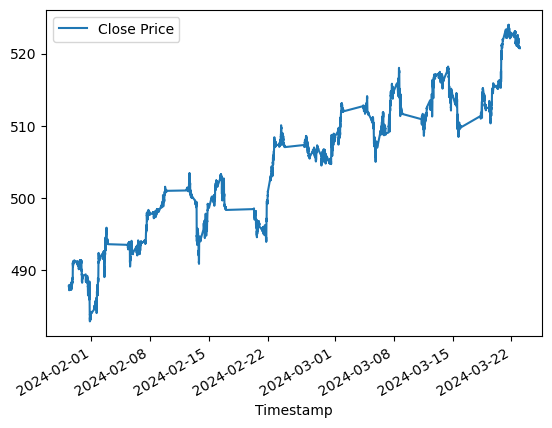

In [83]:
reviews_df.plot(kind='line',x='Timestamp', y='Close Price')
# Straight lines = weekends

In [84]:
#Save data to CSV
reviews_df.to_csv('../Data/spy-agg-02-01-03-22.csv', date_format='%Y-%m-%d %H:%M:%S', index=False)
# -------------------------^^^ Change this to stock you chose

In [85]:
# Test CSV Import

df = pd.read_csv('../Data/spy-agg-02-01-03-22.csv', parse_dates=['Timestamp'])
# ------------------------^^^ Change this to stock you chose
df

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name
0,7510.0,487.7942,487.70,487.81,487.86,487.50,2024-01-29 09:00:00,69,SPY
1,673.0,487.8255,487.80,487.94,487.94,487.79,2024-01-29 09:05:00,11,SPY
2,1265.0,487.7939,487.79,487.79,487.79,487.79,2024-01-29 09:10:00,25,SPY
3,2115.0,487.6452,487.63,487.65,487.70,487.63,2024-01-29 09:15:00,50,SPY
4,3256.0,487.4898,487.54,487.44,487.54,487.44,2024-01-29 09:20:00,35,SPY
...,...,...,...,...,...,...,...,...,...
7332,143.0,520.8990,520.89,520.89,520.89,520.89,2024-03-22 23:35:00,12,SPY
7333,3040.0,520.8529,520.87,520.85,520.87,520.83,2024-03-22 23:40:00,33,SPY
7334,2057.0,520.8294,520.88,520.80,520.89,520.80,2024-03-22 23:45:00,52,SPY
7335,236.0,520.8500,520.85,520.85,520.85,520.85,2024-03-22 23:50:00,14,SPY


In [86]:
# Analysis - Checking Max values
print(f"Max values for Volume: {df['Volume'].max()}")
print(f"Max values for Volume Weighted: {df['Volume Weighted'].max()}")
print(f"Max values for Open Price: {df['Open Price'].max()}")
print(f"Max values for Close Price: {df['Close Price'].max()}")
print(f"Max values for Highest Price: {df['Highest Price'].max()}")
print(f"Max values for Lowest Price: {df['Lowest Price'].max()}")
print(f"Max values for Number of Transaction: {df['Number of Transaction'].max()}")

# Looking at the result, standardizing of data will be needed!

Max values for Volume: 13995574.0
Max values for Volume Weighted: 523.9702
Max values for Open Price: 524.0
Max values for Close Price: 524.01
Max values for Highest Price: 524.11
Max values for Lowest Price: 523.81
Max values for Number of Transaction: 55649
